In [2]:
# import pandas as pd
import geopandas
from geopandas.io.file import read_file
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
shp_path = ".\\DATA\\gpp-test-area.shp"
# shp_path = ".\DATA\gpp-test-area.shp"
sf = shp.Reader(shp_path)

In [3]:
#Convierte ShapeFile a Pandas DataFrame 
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df


In [4]:
#Devuelve un Dataframe filtrado por un minimo de elevacion
# y con el nombre del perimetro
def get_obstaculos(df, perimetro, minimo = 0):
    a = df.loc[df['ELEVATION'] > minimo]
    b = df.loc[df['NAME'].str.contains(perimetro)]
    return a.append(b)

In [5]:
def plot_map(data, sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    for d in data.iterrows():
        shape = sf.shape(d[0])
        x = [i[0] for i in shape.points[:]]
        y = [i[1] for i in shape.points[:]]
        plt.plot(x, y,'k')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('GPP TEST AREA: Monte Mario - Italy')
        '''
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
        '''
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [7]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
   
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

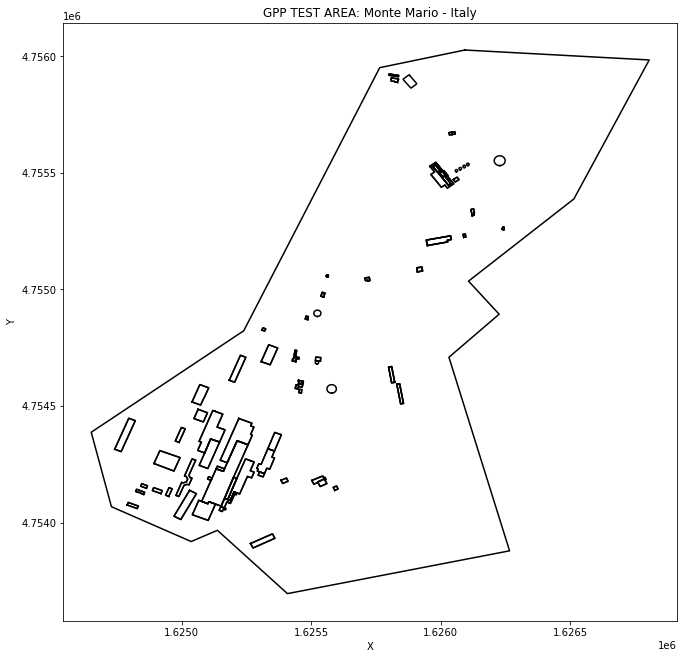

In [11]:
d = read_shapefile(sf)
data = get_obstaculos(read_shapefile(sf),  'gpp-test-area', 30)
fig = plot_map(data, sf, x_lim = None, y_lim = None, figsize = (11,11))
# print('data', data)
# plt.fill
# plot_map_fill(0, sf, color='r')
plt.show()


In [3]:
# pip uninstall numpy
# x = geopandas.read_file('./DATA/gpp-test-area.shp')
# # x

In [9]:
def fix_num_array(x):
    lista = []
    x = x.replace('[','').replace(']','').replace('),',');').split(';')
    for i in x:
        a = i.replace('(','').replace(')','').split(',')
        p = [float(w) for w in a]
        lista.append(p)
    return lista


In [14]:
# data

In [50]:
xpoints = []
ypoints = []
index = []
with open('archivo.csv', 'a') as f:
    
    for i in data.iterrows():
        indice = i[0]
        for j in i[1].coords:
        # print(fix_num_array(str(i[1].coords)))
        # xx = fix_num_array(str(i[1].coords))
            index.append(indice)
            xpoints.append(j[0]) 
            ypoints.append(j[1])
            f.write(str(indice) + ',' + str(j[0]) + ','+ str(j[1])+'\n')

            # cx = i[1].coords[0][0]
            # cy = i[1].coords[0][1]
            # print(i[1].coords)
            print('{0}   {1},{2}'.format(indice,j[0],j[1]) )
            # print(dy)
# cx
# cy
xpoints[20]

2   1626044.43,4755664.46
2   1626033.17,4755662.42
2   1626031.36,4755672.4
2   1626042.67,4755674.45
2   1626044.43,4755664.46
6   1626042.67,4755674.45
6   1626054.06,4755676.51
6   1626055.87,4755666.53
6   1626044.43,4755664.46
6   1626042.67,4755674.45
26   1625832.76,4755887.78
26   1625822.85,4755889.39
26   1625823.18,4755891.43
26   1625807.98,4755893.9
26   1625809.17,4755901.26
26   1625807.91,4755901.46
26   1625808.8,4755907.0
26   1625837.01,4755902.42
26   1625836.22,4755897.53
26   1625834.39,4755897.83
26   1625832.76,4755887.78
30   1625440.2,4754691.15
30   1625437.62,4754691.5
30   1625426.77,4754692.96
30   1625428.18,4754703.48
30   1625432.2,4754702.94
30   1625437.08,4754739.3
30   1625443.43,4754738.45
30   1625439.62,4754710.07
30   1625441.85,4754709.77
30   1625453.17,4754708.25
30   1625452.76,4754705.19
30   1625452.36,4754702.19
30   1625448.89,4754702.66
30   1625441.87,4754703.6
30   1625440.2,4754691.15
32   1625461.65,4754556.58
32   1625451.58,47545

1625832.76

In [49]:
# data = fix_num_array(data)
# xx[0][0]
# xx[1]
# b = data['coords']
# b[2]
index[20]
# xpoints[20]

26